In [1]:
'''
The differece with Pervious Code:
    The Objective functain is chaged from "score" to "get_updated_score"
    and added "updated_hunt" matrix 
    so Max_Score is changed to Max_Updated_Score
'''
import random
import math
import matplotlib.pyplot as plt

with open('input.txt') as f:
    lines = f.read().splitlines()
n = int((lines[0])) #The number of vertices
m = len(lines) - 1 #The number of edjes

hunt = [[False for _ in range (n+1)] for _ in range (n+1)] #The incidence Matrix for hunting graph
for i in range(1, m + 1):
    space = lines[i].find(' ')
    a = int (lines[i][0 : space])
    b = int (lines[i][space+1 : len(lines[i])])
    hunt[a][b] = True #Animal a hunts animal b

In [2]:
'''
updated_hunt[a][b] is True ifoif The animal a is in the hunt chain of animal b
a -> c1 -> c2 -> ... -> ck -> b   (k>=0)
'''

#initialize updated_hunt
updated_hunt = [[False for _ in range (n+1)] for _ in range (n+1)] #Matrix n * n (from 1 to n+1)

m1 = 0 #The counter for count the "True" elements in "updated_hunt"
for i in range(1,n+1):
    hunter = [i]
    while hunter :
        head = hunter[0]
        for j in range(1,n+1):
            if(hunt[j][head] and updated_hunt[j][i] == False ):
                updated_hunt[j][i] = True
                m1 += 1
                hunter.append(j)
        hunter.pop(0)
        

In [3]:
#The score is the number of animal pairs that are in the correct arrangment (according to "updated_hunt"'s matrix)

Goal_Per = [20, 1, 2, 3, 4, 10, 19, 18, 17, 16, 15, 6, 7, 8, 9, 11, 12, 13, 14, 5]
Updated_Max_Score= m1 

#Objective function: returns the score of given permutation(according to "updated_hunt"'s matrix)
def get_updated_score(per):
    c = 0
    for i in range(n):
        for j in range(i, n):
            if(updated_hunt[per[j]][per[i]]):
                c += 1
    return Updated_Max_Score - c

In [4]:
'''
Is used for Crossover function 
It Returns the crossover permutation(child) of two given permutations (parrent1 par1, parrent2 par2) 
par1 is divided to two parts , and each part is sorted like par2's arrangement
'''
def get_child(par1 , par2):
    
    divide_point = random.choice(range(1,n))
    parrent = []
    for i in range(0,n):
        parrent.append((par1[i], par2.index(par1[i])))
    part1 = sorted(parrent[:divide_point], key = compare_sort)
    part2 = sorted(parrent[divide_point:], key = compare_sort)
    
    child = []
    for i in range(0,len(part1)):
        child.append(part1[i][0])
    for i in range(0,len(part2)):
        child.append(part2[i][0])
    return child

#sorts like par2's arrangement
def compare_sort(item):
    return item[1]

In [5]:
'''
Is used For random initial generation
It Returns k random permutations from 1 to n
'''
def get_rand_permutations(k):
    pers = []
    for i in range(k):
        pers.append(random.sample(range(1,n+1),n))
    return pers

In [6]:
'''
Is used For Mutation function
It changes the the given permutation(per) with probability Mutation prob (pr) by one of the ways 
'''
def little_change(per, pr, way = 3):
    decide = random.choices([True, False],[pr, 1-pr])  
    while decide[0]:
        if(way == 1):
            #Swap two items 
            sw = random.sample(range(0,n),2)
            per[sw[0]] , per[sw[1]] = per[sw[1]] , per[sw[0]]
        elif(way == 2):
            #Swap two next eatch other items 
            sw = random.choice(range(1,n))
            per[sw] , per[sw-1] = per[sw-1] , per[sw]
        elif(way == 3):
            #Move one item
            swap_item = random.choice(range(1,n+1))
            per.remove(swap_item)
            insert_index = random.choice(range(0,n-1))
            per.insert(insert_index,swap_item)
        
        decide = random.choices([True, False],[pr, 1-pr])

In [7]:
def most_scores_selection(pers , score, k):
    for_sort= []
    for i in range(len(pers)):
        for_sort.append((score[i], i))
    for_sort.sort(reverse = True)

    selected = []
    weight = []
    
    for i in range(k):
        selected.append(pers[for_sort[i][1]])
        weight.append(for_sort[i][0] - for_sort[k-1][0]+1)
    return (selected,weight)

Goal permutation : [20, 1, 2, 3, 4, 10, 19, 18, 17, 16, 15, 6, 7, 8, 9, 11, 12, 13, 14, 5]
Max score : 145 

Final permutation : [20, 3, 2, 1, 4, 10, 19, 8, 18, 17, 7, 16, 15, 11, 6, 12, 13, 9, 14, 5]
Score of final per : 145 

Number of steps : 15


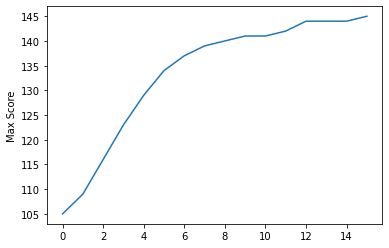

In [8]:
First_Population = 100
Nu_Population = 40
Nu_Selection = 20
Prob_Mutation = 0.5
Max_Cnt = 1e3+100

first_generation = get_rand_permutations(First_Population) 
new_generation = first_generation.copy()

max_score_list = [] #The list of Max score for each generation , Is used for final plotting
current_generation = [] #The list of permutation in current generation
score = [] #The list of scores of permutation in current generation
cnt = 0 #The counter for steps of algorithm

while cnt < Max_Cnt:
    
    # current_generatoin and score
    current_generation = new_generation.copy()
    score = []
    for i in range(len(current_generation)):
        score.append(get_updated_score(current_generation[i]))

    max_score_list.append(max(score)) #Is used for final plotting
    
    #If the goal is in current generation 
    if (Updated_Max_Score in score):
        break
    
    '''
    Selection  
    select k permutations from current generation with most scores (k = "Nu_Selection")
    selected_pers : the list of k permutations with most score
    weight : the list of scores of "selected" list 
    '''
    (selected_pers, weight) = most_scores_selection(current_generation,score, Nu_Selection)

    
    '''
    Cross over
    generate k permutations from selected permutations with probability of weights
    this permutations("new_generations") are replacement for "current_generation"
    '''
    new_generation = []
    for i in range(Nu_Population):
        pars = random.choices(selected_pers, weight, k=2)
        new_generation.append(get_child(pars[0], pars[1]))

    '''
    Mutation
    little change for each permutation of new_generation with probability "Prpb_Mutation" 
    we can use one of 3 ways for this change 
    '''
    for i in range(Nu_Population):
        little_change(new_generation[i], Prob_Mutation, way = 3)
    
    cnt += 1

    
print("Goal permutation :",Goal_Per) 
print("Max score :",Updated_Max_Score,"\n")

id_of_best = score.index(max(score)) # the id of max score permutation in "current_generation"
print("Final permutation :",current_generation[id_of_best])
print("Score of final per :",score[id_of_best],"\n")

if(cnt == Max_Cnt):
    print("Number of steps : Maximum(",cnt,")")
else: 
    print("Number of steps :",cnt)
#plotting the max scores of each step
plt.plot(max_score_list)
plt.ylabel('Max Score')
plt.show()